In [7]:
from crypto_strategy import Util, Strategy
from config import COIN_VIEW, COIN_TA_TABLE_NAME
from db_connector import spot_engine

In [8]:
dfdict = Util.load_data(COIN_VIEW, spot_engine)

In [9]:
first = True
for key in dfdict:
    macd = Strategy(dfdict[key].copy())
    df = macd.execute_strategy()
    if first:
        df_all = df
        first = False
    else:
        df_all = df_all.append(df)
df = df_all.loc[:, ["open",	"high",	"low", "close",	"quotevolume", "symbol", "%K", "%D", "rsi", "macd", "bought", "sold", "profit"]].reset_index()
print(
    df.loc[df.profit != 0, :].groupby("symbol").agg({
        "profit": ["sum", "mean"]
    })
)
Util.write_data(df, COIN_TA_TABLE_NAME, spot_engine)
df.head()

            profit          
               sum      mean
symbol                      
ADAEUR   -0.010357 -0.010357
BNBEUR   -0.018470 -0.018470
BTCEUR   -0.074360 -0.018590
DOGEEUR  -0.026819 -0.006705
ETHEUR    0.064017  0.010669
MATICEUR  0.005968  0.001989
SOLEUR    0.161896  0.040474
TRXEUR   -0.056760 -0.028380
UNIEUR   -0.175766 -0.035153
XRPEUR   -0.152500 -0.076250
writing dataframe to spot table


,starttime,open,high,low,close,quotevolume,symbol,%K,%D,rsi,macd,bought,sold,profit
0,2021-10-02 09:00:00,1.907,1.920,1.905,1.912,4.246125e+05,ADAEUR,28.985507,25.603865,53.933110,-0.004516,0,0,0.0
1,2021-10-02 10:00:00,1.912,1.917,1.903,1.908,2.866396e+05,ADAEUR,23.188406,24.154589,52.198134,-0.004359,0,0,0.0
2,2021-10-02 11:00:00,1.909,1.914,1.897,1.913,4.800350e+05,ADAEUR,30.434783,27.536232,54.182247,-0.003821,0,0,0.0
3,2021-10-02 12:00:00,1.911,1.937,1.909,1.929,5.988263e+05,ADAEUR,64.912281,39.511823,59.915864,-0.002362,0,0,0.0
4,2021-10-02 13:00:00,1.929,1.951,1.925,1.935,1.028449e+06,ADAEUR,72.881356,56.076140,61.844152,-0.001035,0,0,0.0


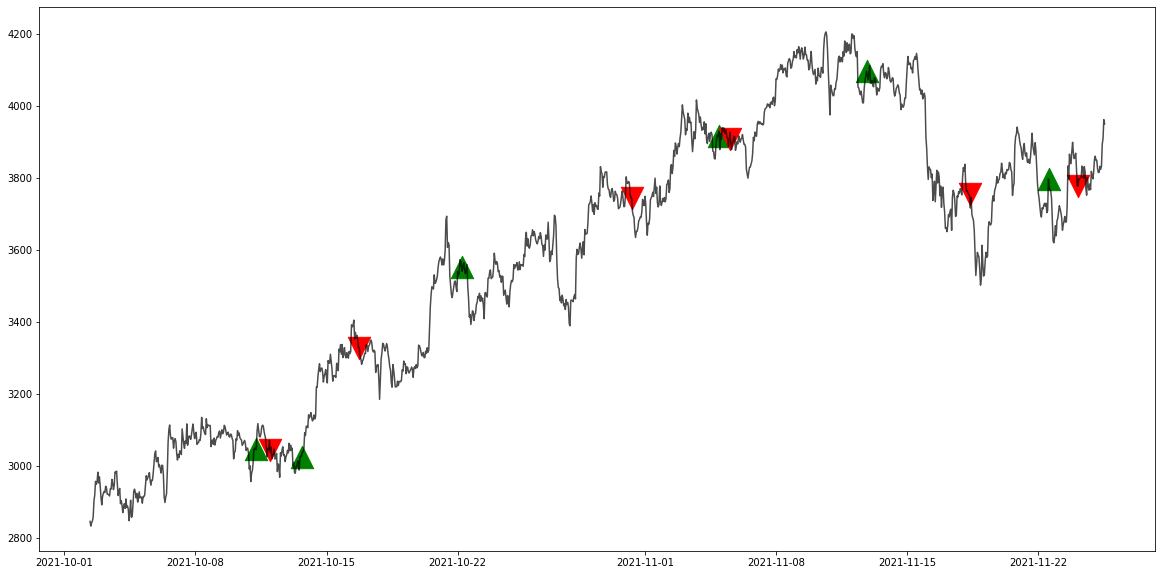

In [10]:
import matplotlib.pyplot as plt
dfviz = df.loc[df.symbol == "ETHEUR", :]
dfviz.index = dfviz.starttime
plt.figure(figsize=(20,10))
plt.plot(dfviz.close, color='k', alpha=0.7)
dfviz.reset_index(inplace=True, drop=True)
plt.scatter(dfviz.loc[dfviz.bought == 1, "starttime"], dfviz.loc[dfviz.bought == 1, "open"], marker='^', color='g', s=500)
plt.scatter(dfviz.loc[dfviz.sold == 1, "starttime"], dfviz.loc[dfviz.sold == 1, "open"], marker='v', color='r', s=500)